<a href="https://colab.research.google.com/github/KoreTane/CBS-Dance---ML/blob/main/CBS_Dance_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install xlsxwriter
#!pip install fuzzywuzzy
#!pip install tabula-py

In [2]:
import pandas as pd  # Manipulação de dados em formato de tabela
import numpy as np  # Para operações numéricas
from scipy import stats  # Para estatística e análise de dados
import xlsxwriter  # Criar e manipular arquivos Excel
import matplotlib.pyplot as plt  # Biblioteca para criação de gráficos
import seaborn as sns  # Biblioteca para visualização de dados
from scipy.stats import chi2_contingency  # Função para calcular a estatística de qui-quadrado
import math  # Operações matemáticas
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import tabula

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
dfc = pd.read_excel('CrmAgendaClientes.xlsx')

In [4]:
# Definir tema global para os gráficos
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    rc={
        'figure.figsize': (12,8)
    }
)

In [5]:
# Listar os atributos e funções de um objeto, excluindo os que começam com _
def list_attributes(obj):
  return [attr for attr in obj.__dir__() if not attr.startswith('_')]

<h1><font size="5" color="#FF69B4">Exploração e tratamento de dados</font></h1>

<p><font size="4">Nesta seção, vamos explorar e tratar os dados para prepará-los para a análise. Isso inclui:

* Visualização dos dados para entender a distribuição e a estrutura
* Tratamento de valores ausentes e outliers
* Transformação de variáveis para melhorar a análise.</font></p>

In [26]:
dfc.head(5)

,DATA 1º CONTATO,TRIMESTRE,NOME COMPLETO,IDADE,FAIXA ETARIA,TELEFONE,STATUS,VIA,ESTILOS,DATA AGENDAMENTO,TURNO,PROFESSOR,COMPARECEU,REAGENDAMENTO,SITUAÇÃO,OBSERVAÇÕES,SITUAÇÃO_FINAL
0,2022-01-07,1,GRAZIELE,22,ADULTO,0000-0000,EXPERIMENTAL,WHATSAPP,JAZZ FUNK,NaT,NOITE,ALISSON,SIM,NÃO,MATRICULADO,Sem observações,CONTRATADO
1,2022-01-07,1,CAMILA,19,ADULTO,0000-0000,CAPTAÇÃO,WHATSAPP,JAZZ,NaT,NOITE,LIA,NÃO,NÃO,SEMANA SOLIDÁRIA,Sem observações,DESISTIU
2,2021-01-05,1,MAIARA GOUVEA,16,ADULTO,0000-0000,EXPERIMENTAL,WHATS,K-POP,NaT,NOITE,ALISSON,NÃO,NÃO,NÃO RESPONDE,Sem observações,DESISTIU
3,2021-01-05,1,ENIALE RAMOS QUINTINO MÃE ELAINE,11,ADOLESCENTE,0000-0000,EXPERIMENTAL,WHATS,JAZZ,NaT,TARDE,LIA,SIM,NÃO,MATRICULADO,Sem observações,CONTRATADO
4,2022-01-07,1,BIA,19,ADULTO,0000-0000,CAPTAÇÃO,WHATSAPP,JAZZ,NaT,NOITE,NÃO INFORMADO,NÃO,NÃO,SEMANA SOLIDÁRIA,Sem observações,DESISTIU


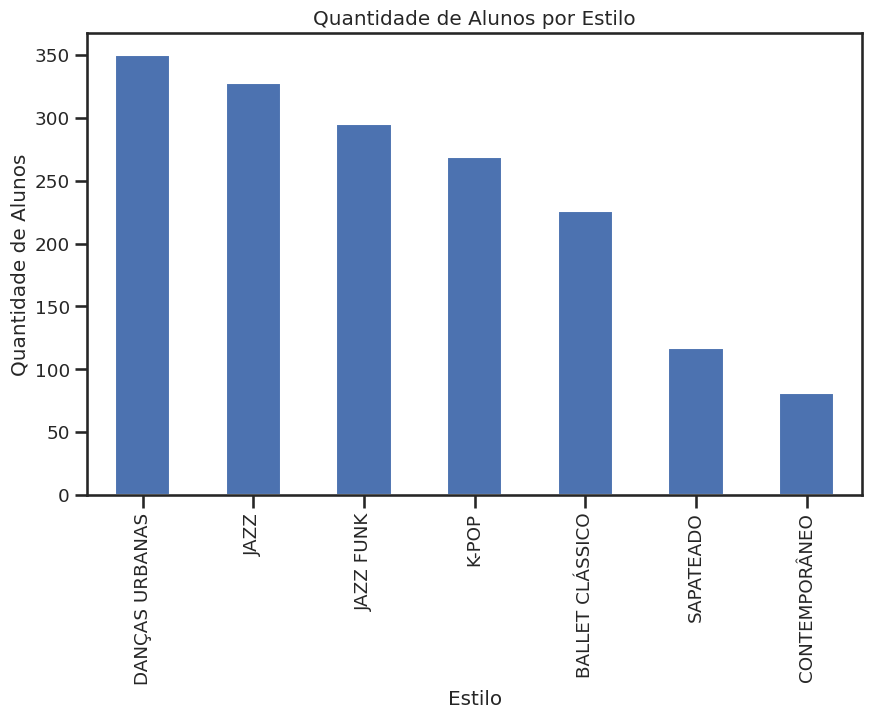

In [6]:
style_counts = dfc['ESTILOS'].value_counts()

# Plotar o gráfico de barras qtd. alundos x estilos
plt.figure(figsize=(10, 6))
style_counts.plot(kind='bar')
plt.title('Quantidade de Alunos por Estilo')
plt.xlabel('Estilo')
plt.ylabel('Quantidade de Alunos')
plt.show()

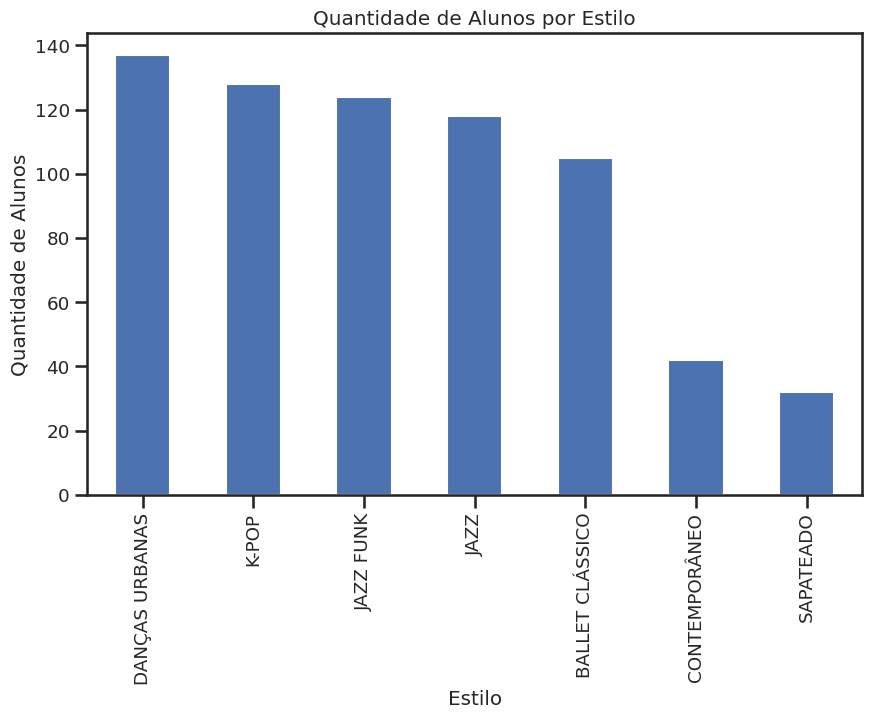

In [28]:
# Filtrar apenas os anos de 2023 e 2024 e situação final 'MATRICULADO'
filtered_dfC = dfc[(dfc['DATA 1º CONTATO'].dt.year.isin([2023, 2024])) & (dfc['SITUAÇÃO_FINAL'] == 'MATRICULADO')]

style_counts = filtered_dfc['ESTILOS'].value_counts()

plt.figure(figsize=(10, 6))
style_counts.plot(kind='bar')
plt.title('Quantidade de Alunos por Estilo')
plt.xlabel('Estilo')
plt.ylabel('Quantidade de Alunos')
plt.show()

In [7]:
# Criar uma tabela de contingência entre as variáveis
contingency_table = pd.crosstab(dfc['FAIXA ETARIA'], dfc['ESTILOS'])

In [8]:
# Calcular o valor de Cramer's V (Medida de correlação entre FAIXA ETARIA e ESTILOS, onde 0 é nenhuma correlação e 1 é correlação perfeita)
chi2, p, dof, expected = chi2_contingency(contingency_table)
cramer_v = math.sqrt(chi2 / (dfc.shape[0] * dfc.shape[1] * (dof - 1)))

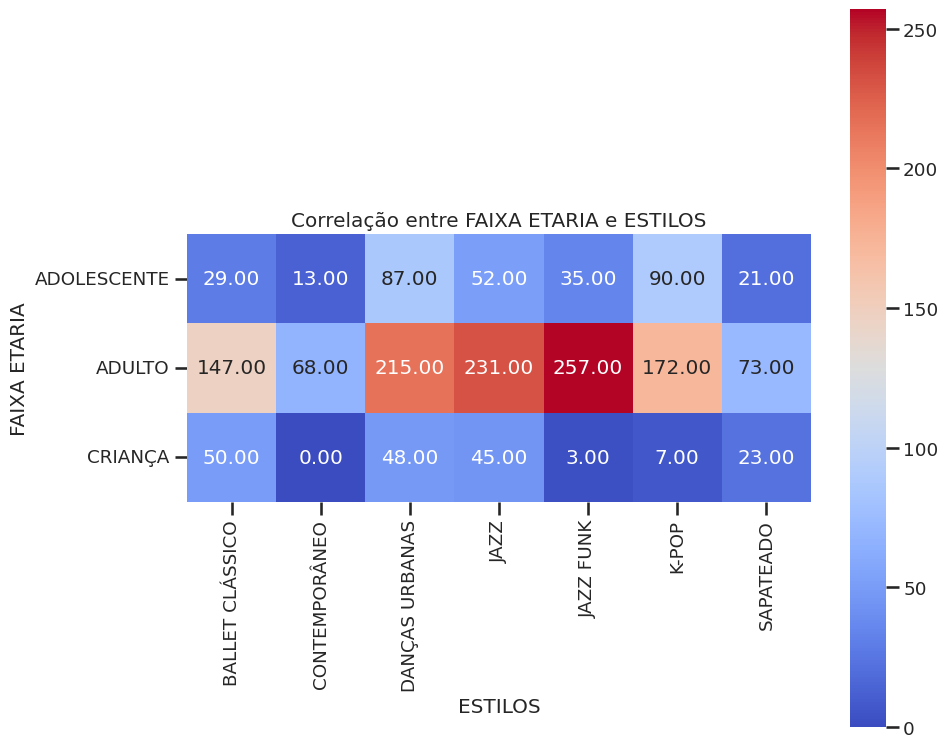

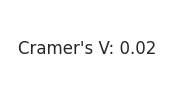

In [9]:
# Plotar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', square=True, fmt='.2f')
plt.title('Correlação entre FAIXA ETARIA e ESTILOS')
plt.tight_layout()
plt.show()

plt.figure(figsize=(2, 1))
plt.text(0.5, 0.5, f'Cramer\'s V: {cramer_v:.2f}', ha='center', va='center', fontsize=12)
plt.axis('off')
plt.show() # Cramer's V é 0.3, isso significa que há uma relação moderada entre a faixa etaria dos alunos e estilos de danças

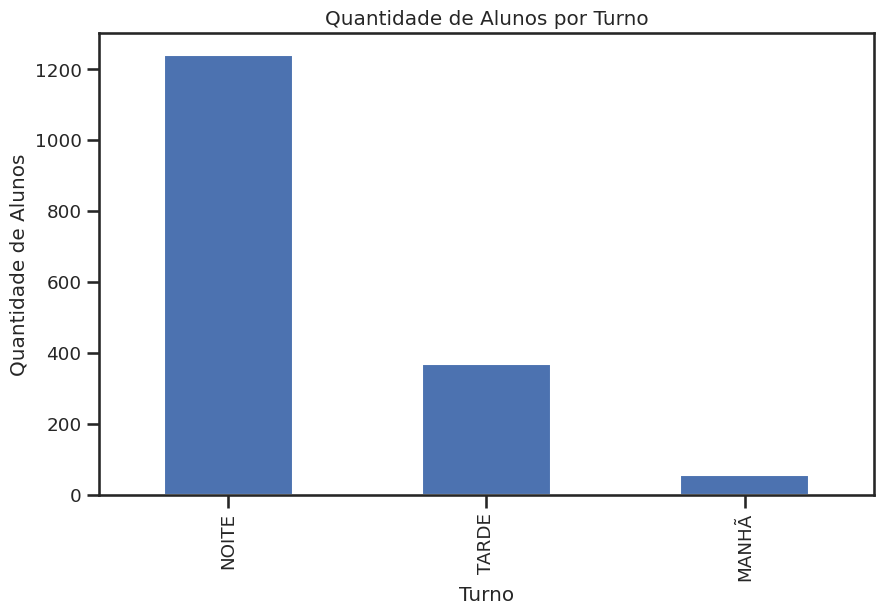

In [10]:
style_countsT = dfc['TURNO'].value_counts()

plt.figure(figsize=(10, 6))
style_countsT.plot(kind='bar')
plt.title('Quantidade de Alunos por Turno')
plt.xlabel('Turno')
plt.ylabel('Quantidade de Alunos')
plt.show()

In [11]:
contingency_tableT = pd.crosstab(dfc['TURNO'], dfc['ESTILOS'])

In [12]:
chi2, p, dof, expected = chi2_contingency(contingency_tableT)
cramer_vT = math.sqrt(chi2 / (dfc.shape[0] * dfc.shape[1] * (dof - 1)))

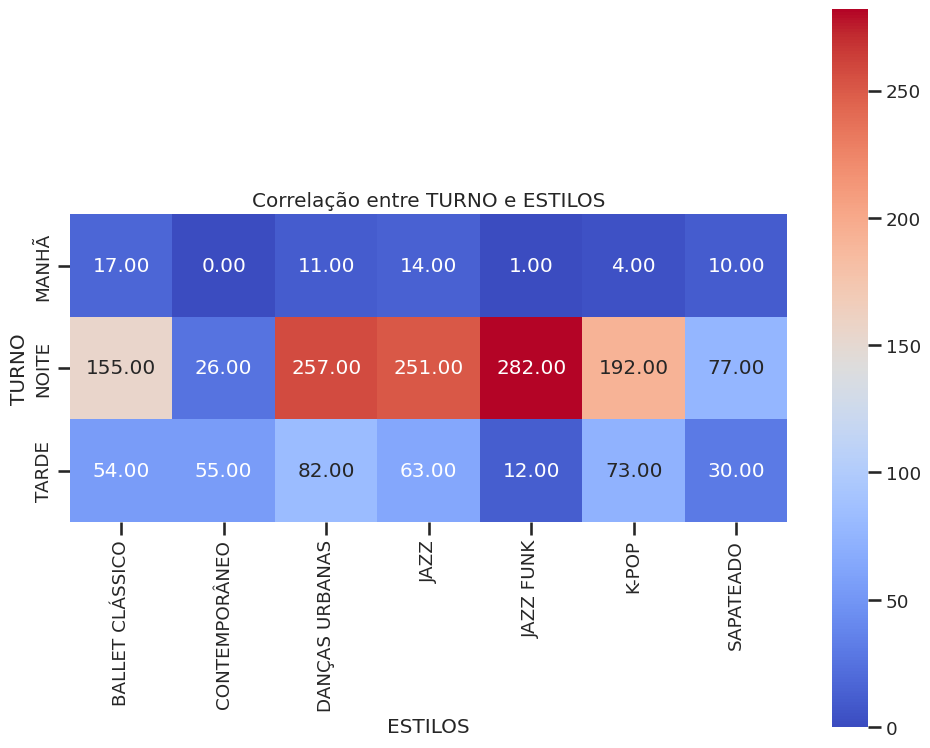

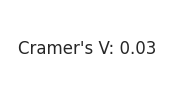

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_tableT, annot=True, cmap='coolwarm', square=True, fmt='.2f')
plt.title('Correlação entre TURNO e ESTILOS')
plt.tight_layout()
plt.show()

plt.figure(figsize=(2, 1))
plt.text(0.5, 0.5, f'Cramer\'s V: {cramer_vT:.2f}', ha='center', va='center', fontsize=12)
plt.axis('off')
plt.show() # Cramer's V é: 0.02 associação fraca entre as variáveis turno e estilos

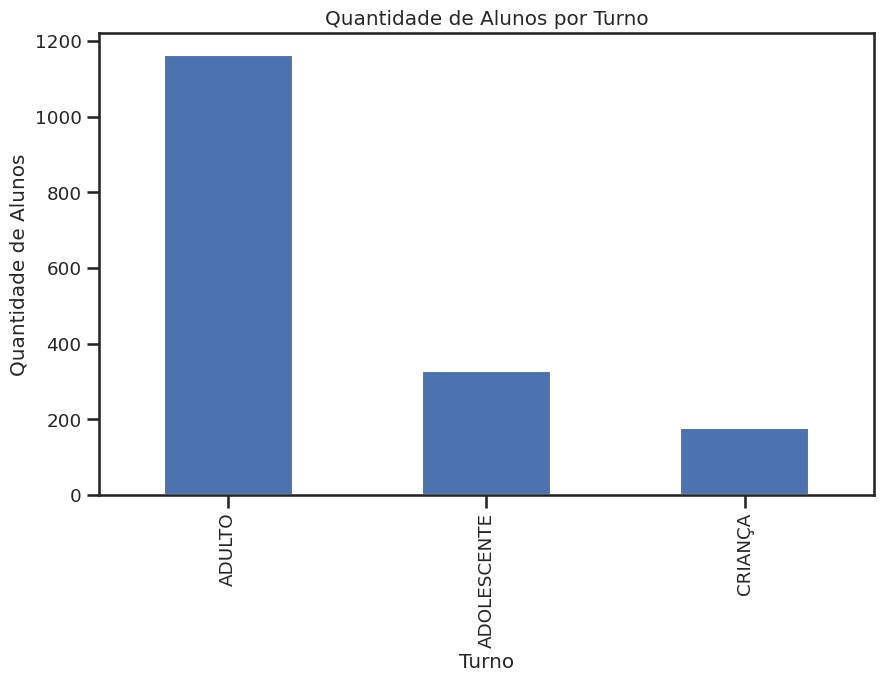

In [14]:
style_countsT = dfc['FAIXA ETARIA'].value_counts()

plt.figure(figsize=(10, 6))
style_countsT.plot(kind='bar')
plt.title('Quantidade de Alunos por Turno')
plt.xlabel('Turno')
plt.ylabel('Quantidade de Alunos')
plt.show()

In [15]:
dfc.head(5)

,DATA 1º CONTATO,TRIMESTRE,NOME COMPLETO,IDADE,FAIXA ETARIA,TELEFONE,STATUS,VIA,ESTILOS,DATA AGENDAMENTO,TURNO,PROFESSOR,COMPARECEU,REAGENDAMENTO,SITUAÇÃO,OBSERVAÇÕES,SITUAÇÃO_FINAL
0,2022-01-07,1,GRAZIELE,22,ADULTO,0000-0000,EXPERIMENTAL,WHATSAPP,JAZZ FUNK,NaT,NOITE,ALISSON,SIM,NÃO,MATRICULADO,Sem observações,CONTRATADO
1,2022-01-07,1,CAMILA,19,ADULTO,0000-0000,CAPTAÇÃO,WHATSAPP,JAZZ,NaT,NOITE,LIA,NÃO,NÃO,SEMANA SOLIDÁRIA,Sem observações,DESISTIU
2,2021-01-05,1,MAIARA GOUVEA,16,ADULTO,0000-0000,EXPERIMENTAL,WHATS,K-POP,NaT,NOITE,ALISSON,NÃO,NÃO,NÃO RESPONDE,Sem observações,DESISTIU
3,2021-01-05,1,ENIALE RAMOS QUINTINO MÃE ELAINE,11,ADOLESCENTE,0000-0000,EXPERIMENTAL,WHATS,JAZZ,NaT,TARDE,LIA,SIM,NÃO,MATRICULADO,Sem observações,CONTRATADO
4,2022-01-07,1,BIA,19,ADULTO,0000-0000,CAPTAÇÃO,WHATSAPP,JAZZ,NaT,NOITE,NÃO INFORMADO,NÃO,NÃO,SEMANA SOLIDÁRIA,Sem observações,DESISTIU


In [16]:
dfc['STATUS'].unique()

array(['EXPERIMENTAL', 'CAPTAÇÃO'], dtype=object)

In [17]:
# Convertendo categorias para category
categorias = ['STATUS', 'VIA', 'ESTILOS', 'PROFESSOR', 'COMPARECEU', 'REAGENDAMENTO', 'SITUAÇÃO', 'FAIXA ETARIA', 'TURNO']
for col in categorias:
    dfc[col] = dfc[col].astype('category')

In [18]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1666 entries, 0 to 1665
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DATA 1º CONTATO   1666 non-null   datetime64[ns]
 1   TRIMESTRE         1666 non-null   int64         
 2   NOME COMPLETO     1664 non-null   object        
 3   IDADE             1666 non-null   int64         
 4   FAIXA ETARIA      1666 non-null   category      
 5   TELEFONE          1666 non-null   object        
 6   STATUS            1666 non-null   category      
 7   VIA               1666 non-null   category      
 8   ESTILOS           1666 non-null   category      
 9   DATA AGENDAMENTO  1666 non-null   object        
 10  TURNO             1666 non-null   category      
 11  PROFESSOR         1666 non-null   category      
 12  COMPARECEU        1666 non-null   category      
 13  REAGENDAMENTO     1666 non-null   category      
 14  SITUAÇÃO          1637 n

In [ ]:
dfm =pd.read_excel('MatriculaCEP.xlsx')

In [ ]:
dfm

In [ ]:
# Deixe a coluna "Nome" em caixa alta
dfm['Nome'] = dfm['Nome'].str.upper()

In [ ]:
nomes_comuns = dfm['Nome'][dfm['Nome'].isin(df['NOME COMPLETO'])]
nomes_comuns

In [ ]:
# Encontre os nomes parecidos em ambas as colunas
nomes_parecidos = []
for nome in dfm['Nome']:
    for outro_nome in df['NOME COMPLETO']:
        if fuzz.ratio(nome, outro_nome) > 80:  # ajuste o valor de threshold aqui
            nomes_parecidos.append((nome, outro_nome))
nomes_parecidos

In [ ]:
nomes_parecidos = pd.Series(nomes_parecidos)
nomes_parecidos.value_counts()

In [ ]:
# Ler o arquivo PDF com configurações de leitura ajustadas
ReceitaSet23 = tabula.read_pdf('Relatório de receitas - Set 23.pdf', pages='all',
                              guess=False,
                              lattice=True,
                              stream=True,
                              multiple_tables=True,
                              pandas_options={'header': None,
                                              'parse_dates': False})

# Substitua os valores vazios por NaN
ReceitaSet23 = ReceitaSet23.replace('', pd.NA)